<h1 style="text-align:right;font-size:140%;color:#000000; font-family: 'XB Zar';"> <strong>فصل 1 - چشم‌انداز یادگیری ماشین</strong>
</h1>


<h1 style="text-align:right;font-size:140%; direction: rtl; color:#000000; font-family: 'XB Zar';">برای ادامه مسیر، بهتر .است از نسخه 3 پایتون استفاده کنید.</h1>

<h1 style="text-align:right;font-size:170%;color:#BE3636; font-family: 'XB Zar';">مثال 1-1</h1>

<h1 style="text-align:right;font-size:140%; direction: rtl;direction: rtl; color:#000000; font-family: 'XB Zar';">تابعی که در ادامه ذکر شده است، به دلیل پیچیدگی و طولانی بودن خطوط آن از کتاب حذف شده است، اما برای ادامه فرایند باید این تابع را در اختیار داشته باشید.</h1>

In [13]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [14]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [15]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [16]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

<h1 style="text-align:right; direction: rtl; font-size: 140%; color:#000000; font-family: 'XB Zar';">
  این داده‌ها در پوشه پروژه و در فایلی به نام <code>datasets/lifesat</code> ذخیره می‌شوند
</h1>


c:\Users\mohammad\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


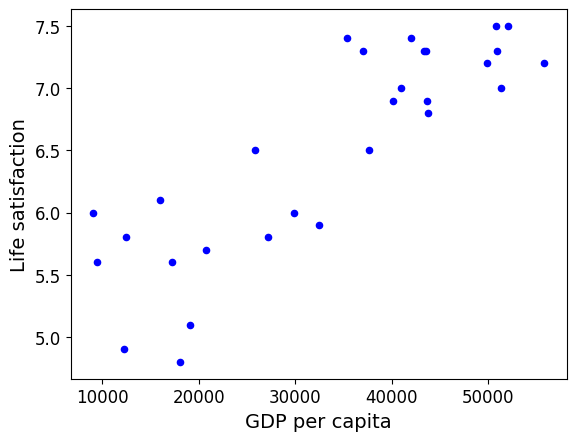

[[5.96242338]]


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', color='blue')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]